# WILLIAM YE U1620917A

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

(a)train dataset described below.

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(a)test dataset described below.

In [4]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



we plot graph against survival status to determine if pclass, sex, sibsp, embarked affects survival rate.

In [6]:
pclass_test = train.pivot_table(index="Pclass",values="Survived")
pclass_test

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [7]:
sex_test = train.pivot_table(index="Sex",values="Survived")
sex_test

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
parents_test = train.pivot_table(index="Parch",values="Survived")
parents_test

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [9]:
SibSp_test = train.pivot_table(index="SibSp",values="Survived")
SibSp_test

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [10]:
ticket_test = train.pivot_table(index="Ticket",values="Survived")
ticket_test.head()

,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000


In [11]:
Embarked_test = train.pivot_table(index="Embarked",values="Survived")
Embarked_test

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


We can see that Pclass and sex are major factors that affect whether they survive or not.
Next, we examine their age.

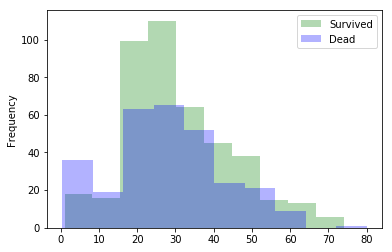

In [12]:
dead = train[train["Survived"] == 0]
dead["Age"].plot.hist(alpha=0.3,color='Green')
survived = train[train["Survived"] == 1]
survived["Age"].plot.hist(alpha=0.3,color='Blue')
plt.legend(['Survived', 'Dead'])
plt.show()


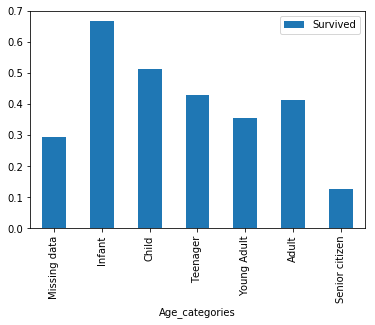

In [13]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-1)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-2,0, 3, 12, 18, 30, 65, 100]
label_names = ["Missing data", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior citizen']

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

(2. data processing) Converting Pclass into 3 different vector.

In [14]:
def split(df,column_name):
    addition = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,addition],axis=1)
    return df

train = split(train,"Pclass")
test = split(test,"Pclass")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,0,1


In [15]:
train=split(train,"Sex")
train=split(train,"Age_categories")
test=split(test,"Sex")
test=split(test,"Age_categories")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing data,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior citizen
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,0,1,0


Model: Logistic regression method.

Reason: It assumes that all predictor values are independent of each other.
    
Input: pclass, age, sex.

Output: survived.

First, our inputs are determined by whether they are a major factor which we considered them to be as explained previously with statistics.

Missing attributes such as those in age are replaced by value of 0. 0 is a good method to label them to be distinct and separates them from the rest while allowing the testing to be carried out simultaneously and easily.

We only consider attributes when it can be described previously by the program and the rest are discarded as we consider them to be irrelevant.

In [16]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing data','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior citizen']


mymodel = LogisticRegression()
mymodel.fit(train[columns], train['Survived'])



D:\Users\woocj\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
holdout = test

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=5)

In [18]:
mymodel = LogisticRegression()
mymodel.fit(train_X, train_y)
predictions = mymodel.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
accuracy

D:\Users\woocj\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8156424581005587

In [19]:
conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Dead'], index=[['Survived', 'Dead']])

,Survived,Dead
Survived,97,14
Dead,19,49


In [20]:
mymodel = LogisticRegression()
mymodel.fit(all_X, all_y)
holdout_predictions = mymodel.predict(holdout[columns])
holdout_predictions

D:\Users\woocj\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [21]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv('submission.csv', index=False)

In [22]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [23]:

test=pd.concat([test,submission["Survived"]],axis=1,sort=False)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_female,Sex_male,Age_categories_Missing data,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior citizen,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,1,0,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0,0,0,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,1,0,0,0,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,1,0,0,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,0,0,0,0,0,1,0,0,1


In [24]:
sex1_test = test.pivot_table(index="Sex",values="Survived")
sex1_test

,Survived
Sex,
female,1.000000
male,0.007519


In [25]:
all_survivors = test[test['Survived'] == True]
len(all_survivors)


154

out of 418 people, there are 154 survivors

In [26]:
len(all_survivors[test['Sex'] == 'female'])

D:\Users\woocj\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


152

out of the 154 survivors, 152 of them are females.

In [27]:
a = len(all_survivors[test['Age_categories_Infant'] == 1])
b = len(all_survivors[test['Age_categories_Child'] == 1])
c = len(all_survivors[test['Age_categories_Teenager'] == 1])
d = len(all_survivors[test['Age_categories_Young Adult'] == 1])
a+b+c+d

D:\Users\woocj\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
D:\Users\woocj\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Users\woocj\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\woocj\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


79

out of 154 survivors, 79 of them are below 18 years old.

In [28]:
e = all_survivors[test['SibSp'] == 0]
f = len(e[test['Parch'] == 0])
f

D:\Users\woocj\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
D:\Users\woocj\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


68

out of 154 survivors, 68 were without family members

In [29]:
pclass_test1 = test.pivot_table(index="Pclass",values="Survived")
pclass_test1

,Survived
Pclass,
1,0.476636
2,0.333333
3,0.330275


from the table above, it can be seen that ticket class 3 has the lowest survival rate, hence least chance of surviving the tragedy

In [30]:
embarked_test1 = test.pivot_table(index="Embarked",values="Survived")
embarked_test1

,Survived
Embarked,
C,0.401961
Q,0.521739
S,0.329630


from the table above, it can be seen that embarking from port S has the lowest survival rate, hence least chance of surviving the tragedy

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
dtree.fit(train_X, train_y)
y_pred1=dtree.predict(test_X)
accuracy2 = accuracy_score(test_y, y_pred1)
accuracy2

0.7988826815642458

In [32]:
conf_matrix = confusion_matrix(test_y, y_pred1)
pd.DataFrame(conf_matrix, columns=['Survived', 'Dead'], index=[['Survived', 'Dead']])

,Survived,Dead
Survived,101,10
Dead,26,42


using the decision tree classifier algorithm, we could only achieve around 80% accuracy rate as shown above.
we can conclude that logistic regression classification algorithm is better by about 1% accuracy rate.

Part (H)

In [35]:
import numpy as np
import PIL
import os
img_data = PIL.Image.open('panda.jpg' )
img_arr = np.array(img_data) 
print(img_arr)

[[[ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]
  ...
  [ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]]

 [[ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]
  ...
  [ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]]

 [[ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]
  ...
  [ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]]

 ...

 [[ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]
  ...
  [ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]]

 [[ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]
  ...
  [ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]]

 [[ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]
  ...
  [ 80  81 101]
  [ 80  81 101]
  [ 80  81 101]]]


Due to time constrains, i will just explain my thought process to tackle the classification to Cifar-100. 
First, import relevant libraries and load the dataset into this notebook. Convert each of the files into an array in their rgb colours. Using the method earlier, we train the model on the given data and learn the relationship between labels and data. Lastly, we use the training to predict labels for new data and calculate the accuracy rate.

Details of Cifar-100 can be described in rgb terms.

The classification can be solved using the same logistic regression algorithm by training the machine to learn the relationship between the rgb array 